# Imports + settings

In [13]:
import os
os.chdir("../..")  # Move one level up  
print(os.getcwd())

/Users/malthepabst/Documents/GitHub/Thesis_Neurodiversity


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scripts.eda_func import plot_small_multiple_rois, test_dist, group_roi_heat_map

In [15]:
num_of_rois = 17
roi_names = [f"ROI_{i+1}" for i in range(num_of_rois)]
meta_data = pd.read_csv(f'data.nosync/phenotypic/subjects_with_meta_{num_of_rois}.csv',
                         index_col= 'Unnamed: 0')
meta_data['Sub ID'] = meta_data['Sub ID'].apply(lambda x: str(x).zfill(7))
meta_data.shape

(660, 8)

# Participant stats

### Take-aways

[WRITE SOME STUFF HERE WHEN THE META DATA IS SORTED OUT]

In [4]:
participants = meta_data.drop_duplicates(subset=['Sub ID', 'Dataset'])
participants['Co-Diagnosis'] = participants['Co-Diagnosis'].replace({np.nan: ''})
participants.groupby(['Diagnosis','Co-Diagnosis', 'Sex']).agg({'Sex':['count'],
                                                                'IQ':['min', 'max', 'mean', 'std'], 
                                                                'Age':['min', 'max', 'mean', 'std']})


/var/folders/dn/nd5kb8wx3xs44tlt7kst4n7h0000gn/T/ipykernel_34018/220691562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participants['Co-Diagnosis'] = participants['Co-Diagnosis'].replace({np.nan: ''})


Sex     IQ                                \
                              count    min    max        mean        std   
Diagnosis Co-Diagnosis Sex                                                 
ADHD                   Female    27   78.0  128.0  106.920000  12.724386   
                       Male      76   73.0  134.0  105.945946  14.895887   
          Other        Female     8   75.0  127.0  107.375000  15.574131   
                       Male      33   82.0  132.0  103.562500  13.452275   
ASD                    Female     7   78.0  134.0  101.428571  22.618997   
                       Male      50   67.0  137.0  101.740000  17.090169   
          ADHD         Female     3   74.0  132.0  106.666667  29.687259   
                       Male      34   75.0  148.0  110.909091  17.782301   
          Other        Female     3   91.0  118.0  102.333333  14.011900   
                       Male      20   80.0  142.0  110.400000  16.368776   
TD                     Female    75   80.0  140.0  109.690141  14.740219   
                       Male     146   80.0  144.0  113.524476  13.479683   
          Other        Female     1  101.0  101.0  101.000000        NaN   
                       Male       5   81.0  129.0  117.400000  20.427922   

                                  Age                               
                                  min    max       mean        std  
Diagnosis Co-Diagnosis Sex                                          
ADHD                   Female   7.350  17.15  10.351481   2.553156  
                       Male     7.260  17.61  11.201842   2.744991  
          Other        Female   8.610  13.24  10.936250   1.807413  
                       Male     7.240  17.37  11.537576   2.739780  
ASD                    Female   5.220  34.76  14.442857   9.680924  
                       Male     5.320  39.10  12.828120   6.696238  
          ADHD         Female  10.000  38.76  20.174667  16.119519  
                       Male     5.928  26.62  10.593176   5.348535  
          Other        Female   6.750  24.41  17.990000   9.766944  
                       Male     5.920  29.18  13.570500   5.769673  
TD                     Female   5.907  29.13  12.996893   4.821956  
                       Male     5.887  30.78  13.184863   5.333637  
          Other        Female   8.100   8.10   8.100000        NaN  
                       Male     7.190  16.93  12.868000   3.963158

# Plot distribution of voxels

### Take-aways:
When we look at the std/mean ratio, we can see that most of the regions does not vary that much, 1-4%. However the ration for ROI 9 and 10, has a ratio of approxmiately 28\% and 33\%. When investigating ROI 5 along with the age, it is clear that there is some sort of correlation between the size of this ROI and the age.

Looking at the total number of voxels, plottet against age, we see that there is a correlation between age and the number of voxels. Mainly that the younger the subject is, the more voxels there is.

In [5]:
num_of_voxels = pd.read_csv(f'data.nosync/stats/num_of_voxels_pr_timestep_{num_of_rois}.csv',
                            index_col= 'Unnamed: 0')
num_of_voxels['Sub ID'] = num_of_voxels['Sub ID'].apply(lambda x: str(x).zfill(7))
num_of_voxels['Total'] = num_of_voxels[roi_names].sum(axis = 1)
num_of_voxels = pd.merge(num_of_voxels, meta_data, how="left", on=['Sub ID', 'Dataset'])
num_of_voxels['Full Diagnosis'] = num_of_voxels['Diagnosis'] + '+' + num_of_voxels['Co-Diagnosis'].apply(lambda x: str(x))
num_of_voxels['Full Diagnosis'] = num_of_voxels['Full Diagnosis'].apply(lambda x: x.replace('+nan', ''))
num_of_voxels = num_of_voxels.sort_values('Full Diagnosis')

In [6]:
stats_voxels = num_of_voxels[roi_names+['Total']].describe()

In [7]:
stats_voxels = stats_voxels.T.reset_index()
stats_voxels = stats_voxels[['index', 'mean', 'std']]
#Calculate the "ratio" to make them compareable between the ROIs
# Aka is the STD proportional bigger to the mean that other ROIs
stats_voxels['ratio'] = stats_voxels['std']/stats_voxels['mean']*100
stats_voxels

,index,mean,std,ratio
0,ROI_1,3002.336327,106.922501,3.561310
1,ROI_2,2139.077844,19.761614,0.923838
2,ROI_3,2719.496008,44.558378,1.638479
3,ROI_4,2286.972056,33.234601,1.453214
4,ROI_5,2373.137725,66.126004,2.786438
5,ROI_6,1973.732535,36.114320,1.829747
6,ROI_7,2512.247505,19.588030,0.779701
7,ROI_8,2324.967066,26.163780,1.125340
8,ROI_9,965.699601,275.287057,28.506490
9,ROI_10,618.623752,210.266724,33.989436


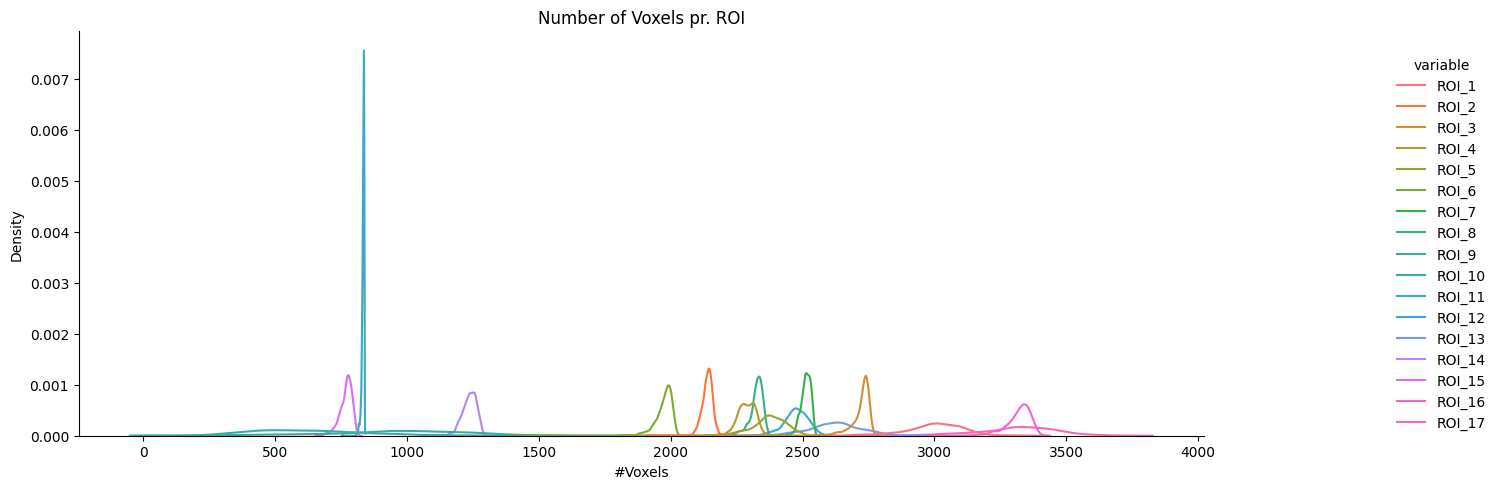

In [8]:
melted = num_of_voxels[roi_names].melt()

# setting the dimensions of the plot
p = sns.displot(data = melted,
            x='value',
            hue='variable',
            kind="kde")
p.set(title='Number of Voxels pr. ROI', xlabel= '#Voxels')
p.fig.set_figwidth(15)
p.fig.set_figheight(5)
p.tight_layout()
p.savefig(f'notebooks/pics/{num_of_rois} ROIs/Number_voxels_pr_roi_dist.png', dpi = 300)

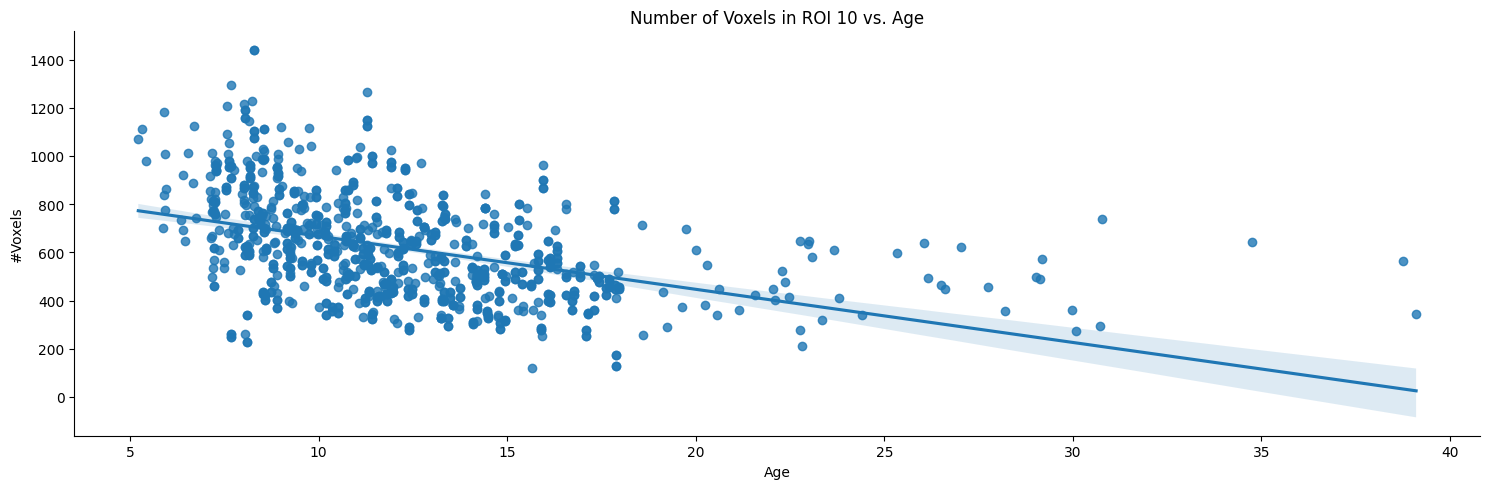

In [9]:
# setting the dimensions of the plot
p = sns.lmplot(data = num_of_voxels,
                    x='Age',
                    y='ROI_10',
                    truncate=True)
p.set(title='Number of Voxels in ROI 10 vs. Age', xlabel= 'Age', ylabel='#Voxels')
p.fig.set_figwidth(15)
p.fig.set_figheight(5)
p.tight_layout()
p.savefig(f'notebooks/pics/{num_of_rois} ROIs/ROI_10_voxels_age.png', dpi = 300)

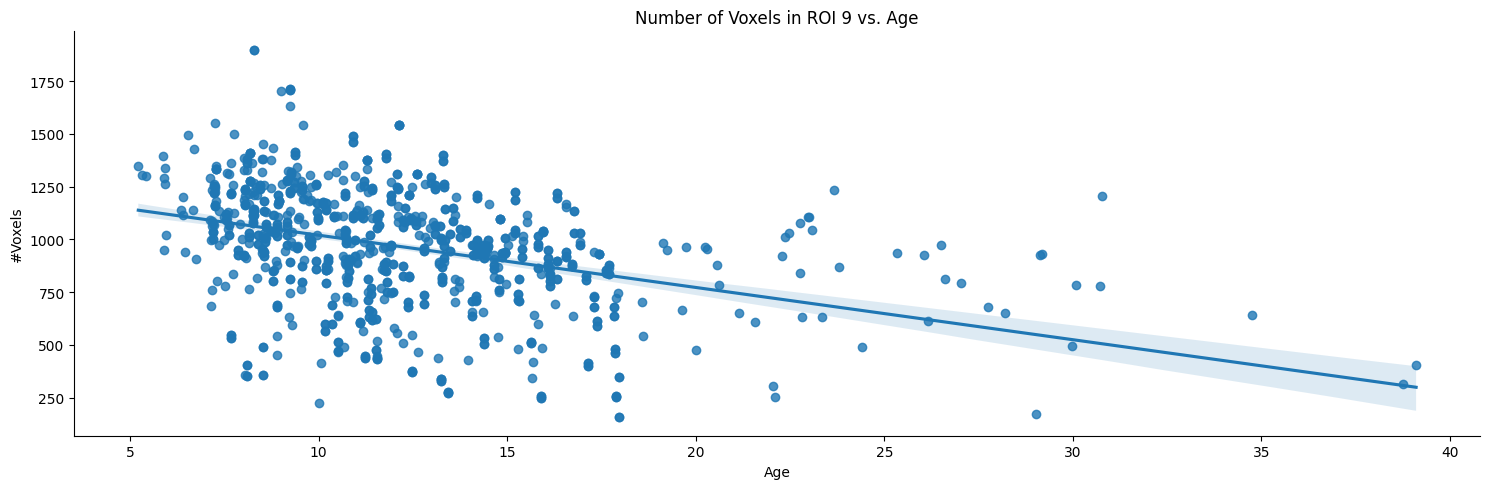

In [10]:
# setting the dimensions of the plot
p = sns.lmplot(data = num_of_voxels,
                    x='Age',
                    y='ROI_9',
                    truncate=True)
p.set(title='Number of Voxels in ROI 9 vs. Age', xlabel= 'Age', ylabel='#Voxels')
p.fig.set_figwidth(15)
p.fig.set_figheight(5)
p.tight_layout()
p.savefig(f'notebooks/pics/{num_of_rois} ROIs/ROI_9_voxels_age.png', dpi = 300)

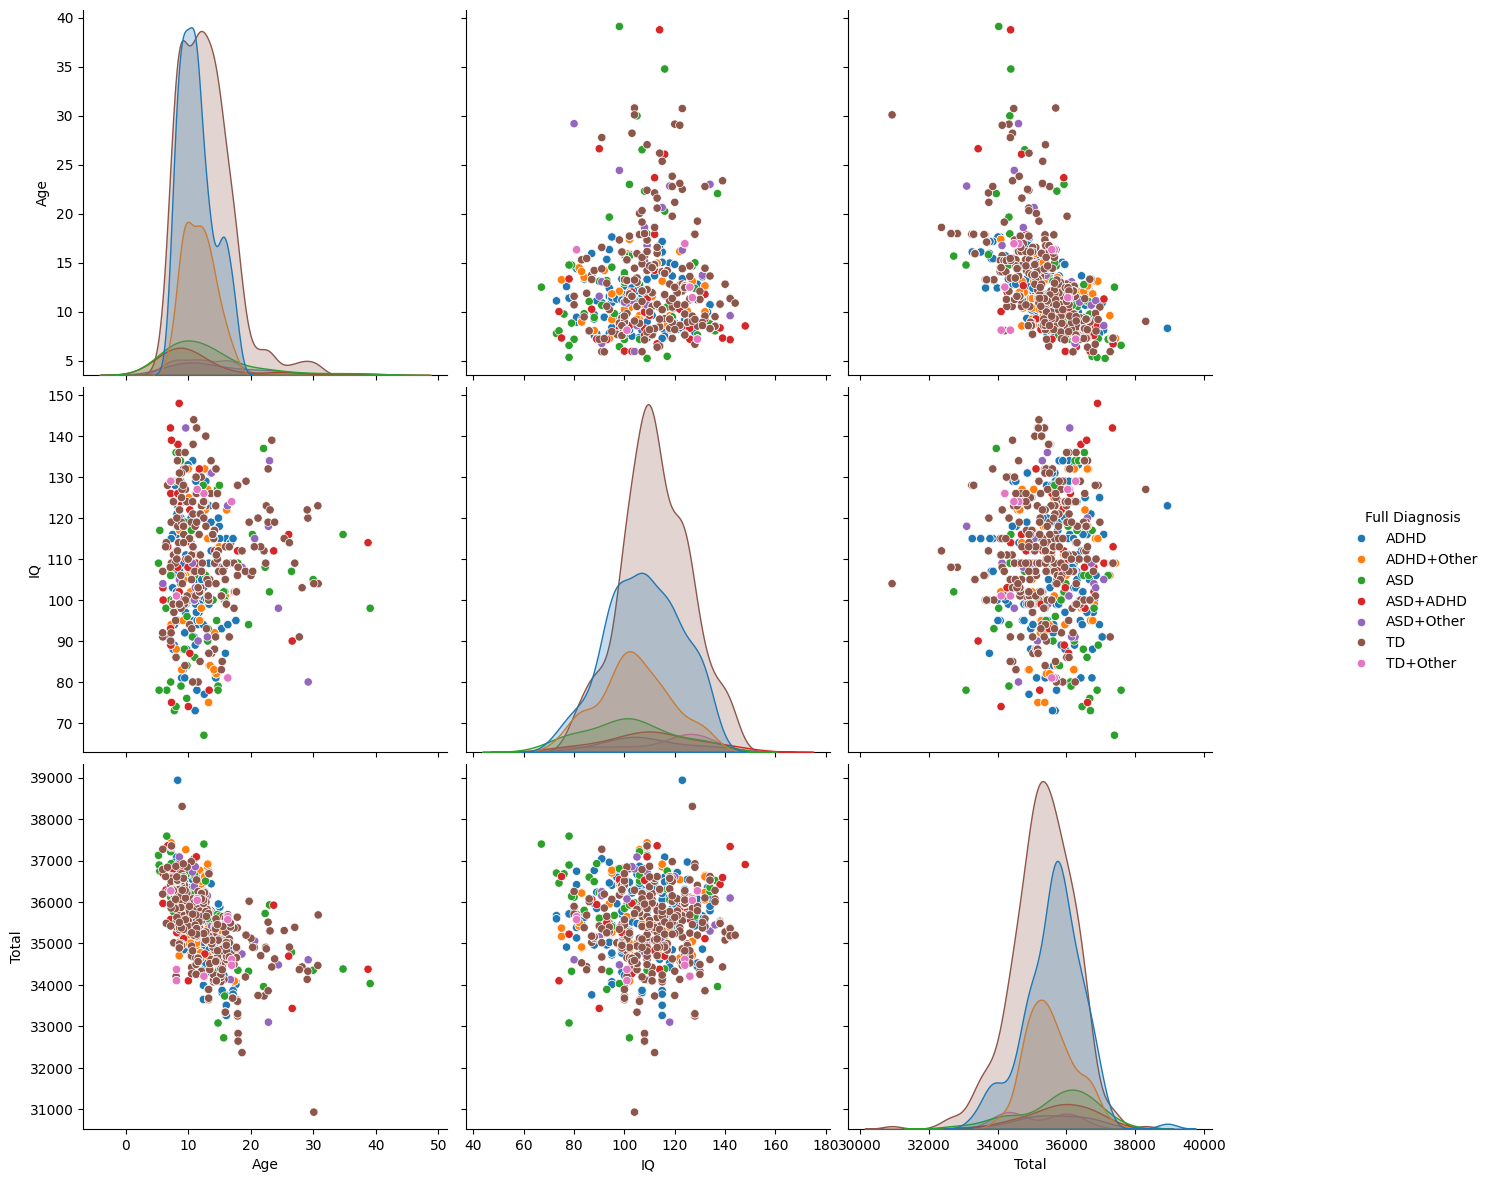

In [11]:
p = sns.pairplot(num_of_voxels[['Full Diagnosis','Age', 'IQ', 'Total']], hue="Full Diagnosis")
p.fig.set_figwidth(15)
p.fig.set_figheight(12)
p.tight_layout()
p.savefig(f'notebooks/pics/{num_of_rois} ROIs/Pairplot_metadata.png', dpi = 300)

# Binning and correlation

In [12]:
meta_data.iloc[1].file_path.replace('clean','stats').replace('bold.npz', 'b.csv')
file_list = meta_data.copy()
file_list['file_path'] = file_list['file_path'].apply(lambda x: x.replace('clean','stats').replace('bold.npz', 'b.csv'))

file_list['Co-Diagnosis'] = file_list['Co-Diagnosis'].apply(lambda x: str(x))
file_list['Full Diagnosis'] = file_list['Diagnosis'] + '+' + file_list['Co-Diagnosis']
file_list['Full Diagnosis'] = file_list['Full Diagnosis'].apply(lambda x: x.replace('+nan','').replace('TD+Other', 'TD'))

In [13]:
bins = [1/(n+1) for n in range(17)]
#[10, 11, 12, 13, 14, 15, 16, 18, 20, 22, 25, 29, 35, 44, 59, 88, 176]
#bin_sizes = list(set([int(round(i*176)) for i in bins]))
#bin_sizes.sort()

bin_sizes = [10, 15, 20, 25, 30, 35, 45, 60, 88, 172]


#Make for loop

final_data_dict = {}

#For each diagnosis
for diag in file_list['Full Diagnosis'].unique():
    print(diag)
    temp_subs = file_list[file_list['Full Diagnosis'] == diag]
    diag_data = []
    #for each subject
    for idx, row in temp_subs.iterrows():
        test_sub = pd.read_csv(row['file_path'], delimiter = ';', index_col = 'Unnamed: 0')
        scan_length = test_sub.shape[0]
        for bin in bin_sizes:
            time = 1
            #add each bin step
            for i in range(bin, scan_length, bin+1):
                means = test_sub.iloc[i-bin:i].mean().to_dict()
                means['Time'], means['Bin'], means['Subject'], means['Dataset'], means['Full Diagnosis'] = time, bin, row['Sub ID'], row['Dataset'], diag 
                diag_data.append(means)
                time += 1
            #Add the remaning timesteps
            means = test_sub.iloc[i+1:scan_length].mean().to_dict()
            means['Time'], means['Bin'], means['Subject'], means['Dataset'], means['Full Diagnosis'] = time, bin, row['Sub ID'], row['Dataset'], diag 
            diag_data.append(means)
    final_data_dict[diag] = pd.DataFrame(diag_data)

#Save files
for key, value in final_data_dict.items():
    value.to_csv(f'data.nosync/stats/bins_{num_of_rois}/{key}.csv')

ASD
ASD+ADHD
ASD+Other
TD
ADHD
ADHD+Other


In [14]:
coor_data_dict = {}
coor_mask = np.triu(np.ones((num_of_rois,num_of_rois), dtype=bool), 1)

#For each diagnosis
for key, value in final_data_dict.items():
    print(key)
    temp_dataset = final_data_dict[key]
    #Get subjects
    subjects = set(zip(temp_dataset['Subject'].tolist(), temp_dataset['Dataset'].tolist()))
    #Make list of dataframes
    subjects_data_coor = []
    #For each subject
    for sub in subjects:
        subject_data = temp_dataset[(temp_dataset['Subject'] == sub[0]) & (temp_dataset['Dataset'] == sub[1])]
        #For each bin size
        for bin in bin_sizes:
            correlation_matrix = subject_data[subject_data['Bin']==bin][roi_names].corr().to_numpy()
            #Mask dataframe
            sub_coor_values = pd.DataFrame(correlation_matrix[coor_mask], columns=['Coor_value'])
            #Add bin
            sub_coor_values['bin'] = bin
            #Add to data
            subjects_data_coor.append(sub_coor_values)
    coor_data_dict[key] = pd.concat(subjects_data_coor).reset_index()

ASD
ASD+ADHD
ASD+Other
TD
ADHD
ADHD+Other


In [15]:
for key, value in coor_data_dict.items():
    temp_data = coor_data_dict[key]
    for i in temp_data.bin.unique():
        print(f"Diagnosis: {key}, bin: {i}, variance: {temp_data[temp_data['bin'] == i]['Coor_value'].var()}")

Diagnosis: ASD, bin: 10, variance: 0.17754251005977925
Diagnosis: ASD, bin: 15, variance: 0.24234814989755102
Diagnosis: ASD, bin: 20, variance: 0.2524084271700142
Diagnosis: ASD, bin: 25, variance: 0.24795895287665964
Diagnosis: ASD, bin: 30, variance: 0.27429700674574775
Diagnosis: ASD, bin: 35, variance: 0.31624204222503494
Diagnosis: ASD, bin: 45, variance: 0.40272558462206764
Diagnosis: ASD, bin: 60, variance: 0.5538528735052631
Diagnosis: ASD, bin: 88, variance: 0.9992020737295589
Diagnosis: ASD, bin: 172, variance: 0.9988242137670176
Diagnosis: ASD+ADHD, bin: 10, variance: 0.183776612357599
Diagnosis: ASD+ADHD, bin: 15, variance: 0.23904548340964707
Diagnosis: ASD+ADHD, bin: 20, variance: 0.2685729102500171
Diagnosis: ASD+ADHD, bin: 25, variance: 0.26617774773702774
Diagnosis: ASD+ADHD, bin: 30, variance: 0.2800251354350825
Diagnosis: ASD+ADHD, bin: 35, variance: 0.31468279412448324
Diagnosis: ASD+ADHD, bin: 45, variance: 0.40605710786154403
Diagnosis: ASD+ADHD, bin: 60, varianc

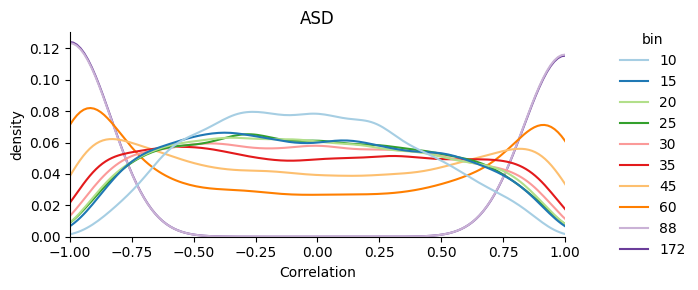

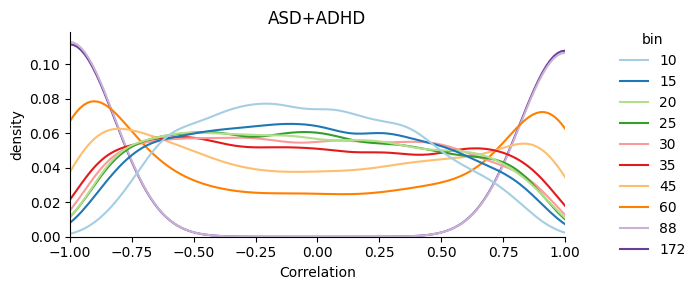

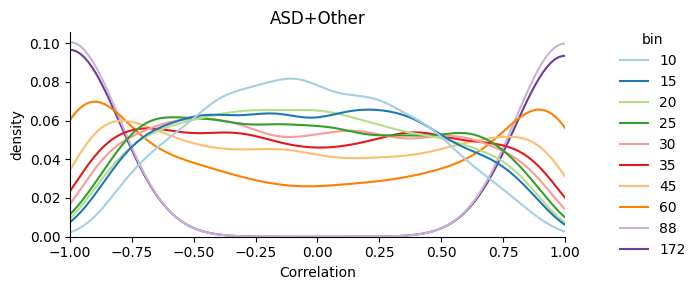

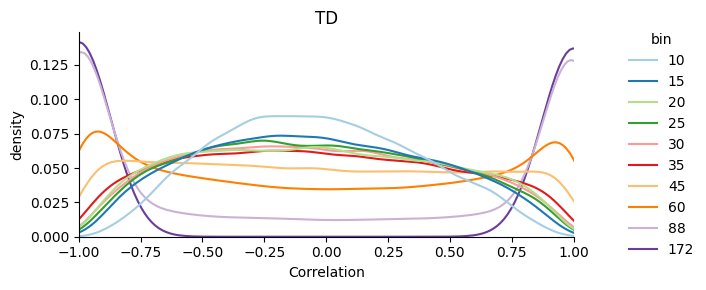

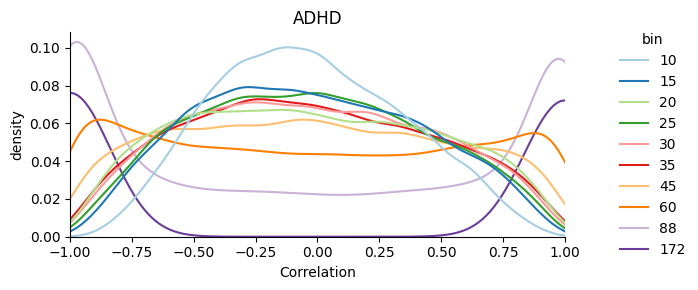

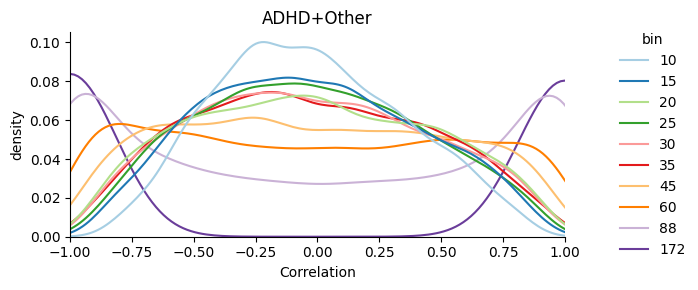

In [127]:
for key, value in coor_data_dict.items():
    temp_data = coor_data_dict[key]
    p = sns.displot(data = temp_data,
                x='Coor_value',
                hue='bin',
                kind="kde",
                palette= "Paired")
    p.set(title=key, xlabel= 'Correlation', ylabel='density', xlim=(-1,1))
    p.fig.set_figwidth(7)
    p.fig.set_figheight(3)
    p.tight_layout()


# Mean and variance pr. timestep

## Mean

We can see that the distributions are very similar, which makes sense since the values have been standardized in the preprocessing step. Furthermore there is only a statistical significats difference between ROI 3 and the diagnosis groups, with a p-value of 0.036. However we have not corrected for multiple hypothesis testing, e.g using the bonferroni correction, thus this is H_1 hypothesis is not accepted - aka. we do not use this hypothesis.

In [17]:
mean_data = pd.read_csv(f'data.nosync/stats/{num_of_rois}_mean_subject.csv', delimiter= ";", index_col = 'Unnamed: 0')
mean_data['subject'] = mean_data['subject'].apply(lambda x: str(x).zfill(7))
mean_data = mean_data.sort_values(['subject', 'dataset'])
mean_data['Sex'] = meta_data.sort_values(['Sub ID', 'Dataset'])['Sex']

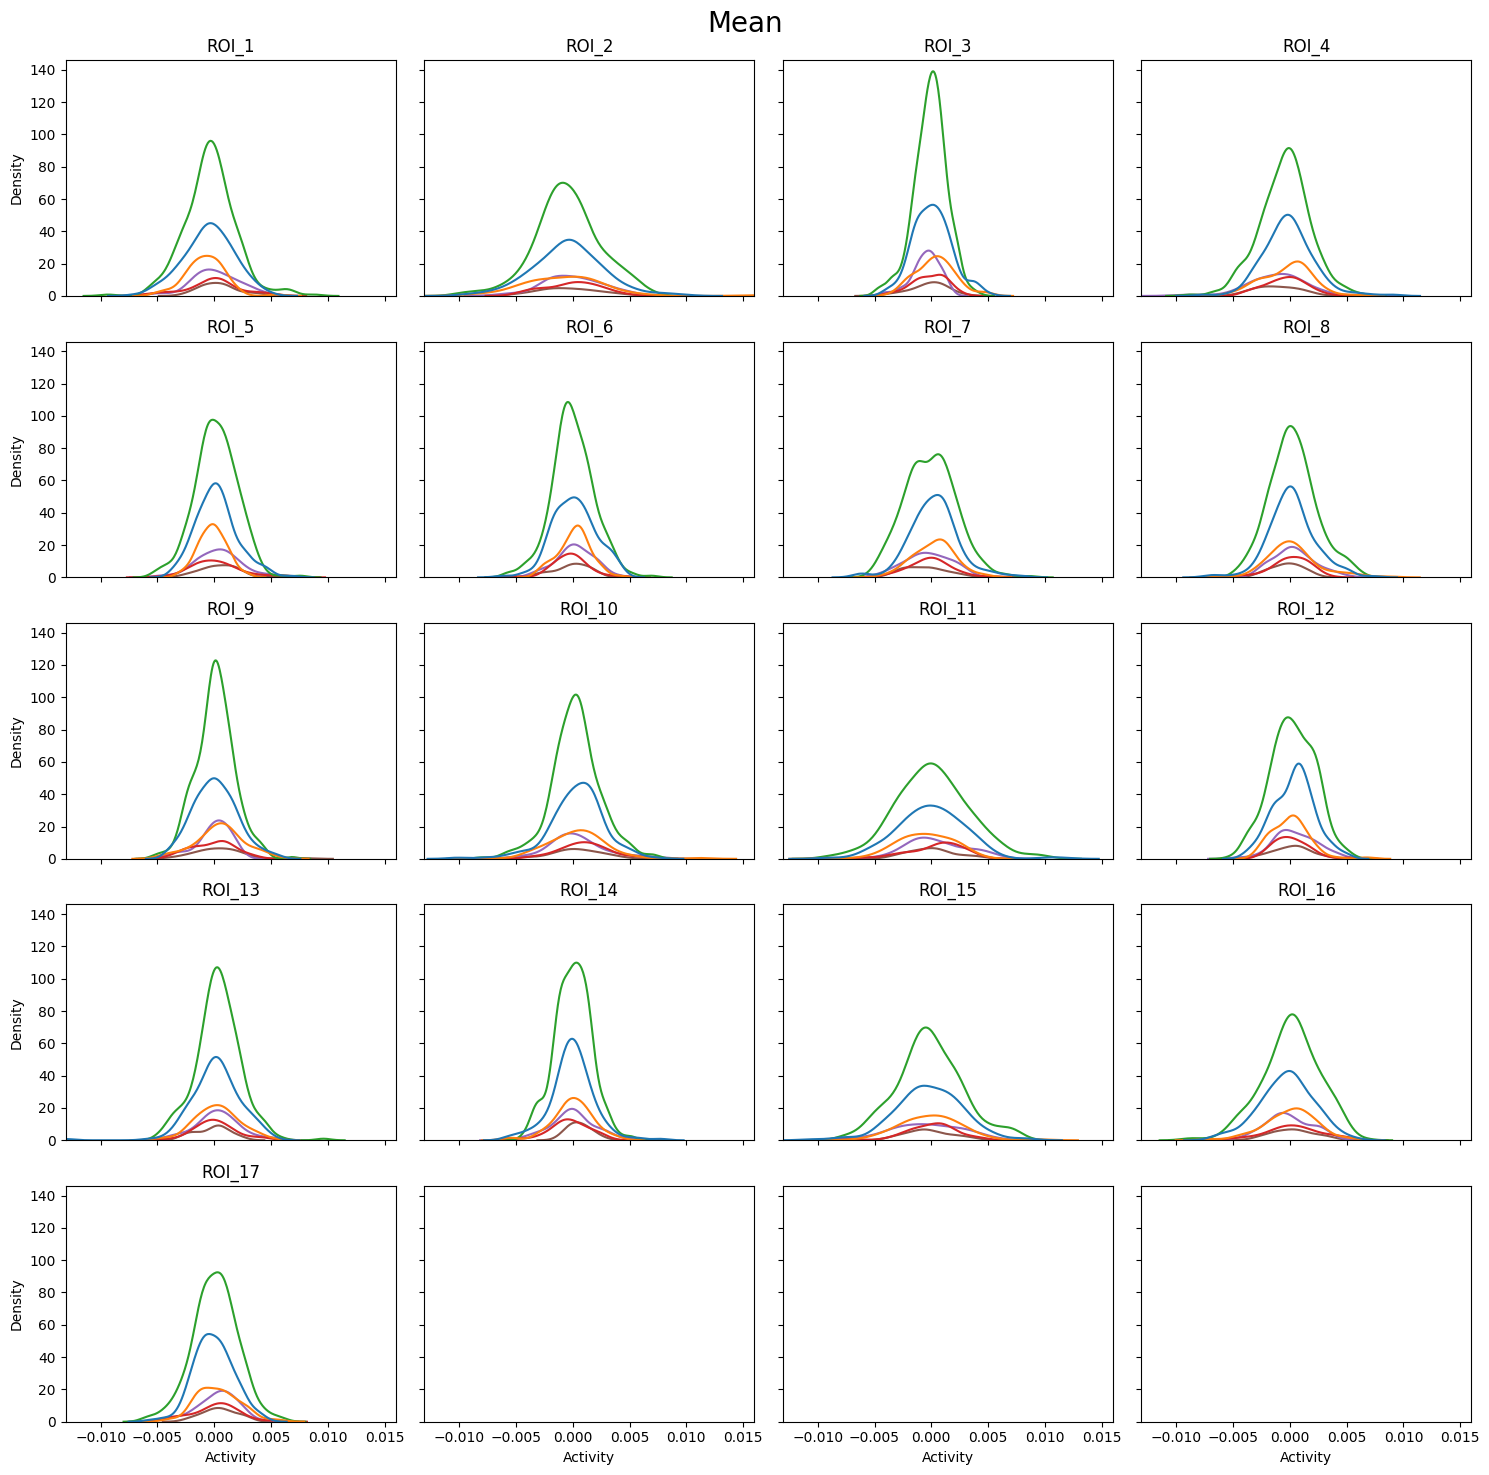

In [18]:
plot_small_multiple_rois(data = mean_data, regions = roi_names , title = 'Mean', hue_col = 'diagnosis')

In [19]:
test_dist(data = mean_data, regions = roi_names)

ROI_1 (Between sex): The P-value is 0.6728863045381785
ROI_2 (Between sex): The P-value is 0.33648701302831796
ROI_3 (Between sex): The P-value is 0.9541674351564778
ROI_4 (Between sex): The P-value is 0.8618517326723446
ROI_5 (Between sex): The P-value is 0.8511591103377585
ROI_6 (Between sex): The P-value is 0.8854795170626402
ROI_7 (Between sex): The P-value is 0.28042870499912875
ROI_8 (Between sex): The P-value is 0.6896106059816812
ROI_9 (Between sex): The P-value is 0.10711939568387999
ROI_10 (Between sex): The P-value is 0.7247561319148703
ROI_11 (Between sex): The P-value is 0.05233762473247063
ROI_12 (Between sex): The P-value is 0.9550378979403484
ROI_13 (Between sex): The P-value is 0.5381888828535848
ROI_14 (Between sex): The P-value is 0.7985984364400434
ROI_15 (Between sex): The P-value is 0.17850264962002696
ROI_16 (Between sex): The P-value is 0.9117042326228938
ROI_17 (Between sex): The P-value is 0.46423826395127576
##################################################


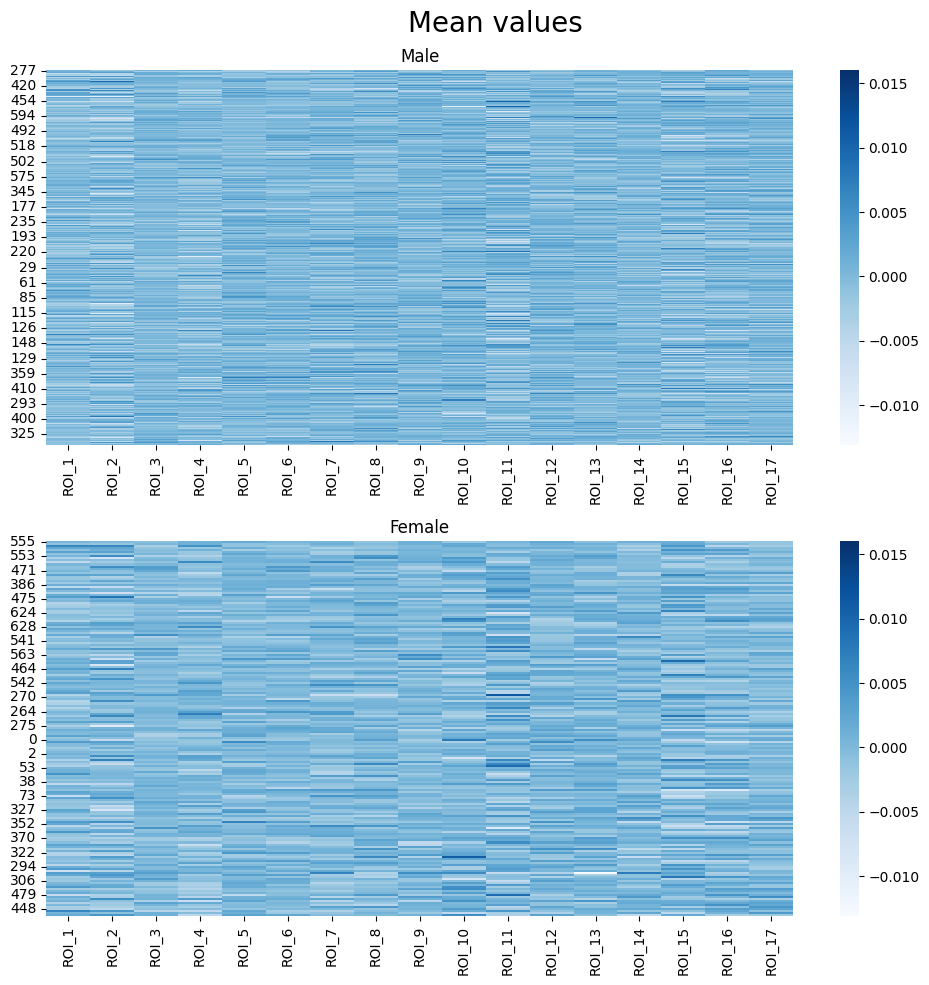

In [26]:
group_roi_heat_map(data = mean_data, group = 'Sex', title = 'Mean values', regions = roi_names)

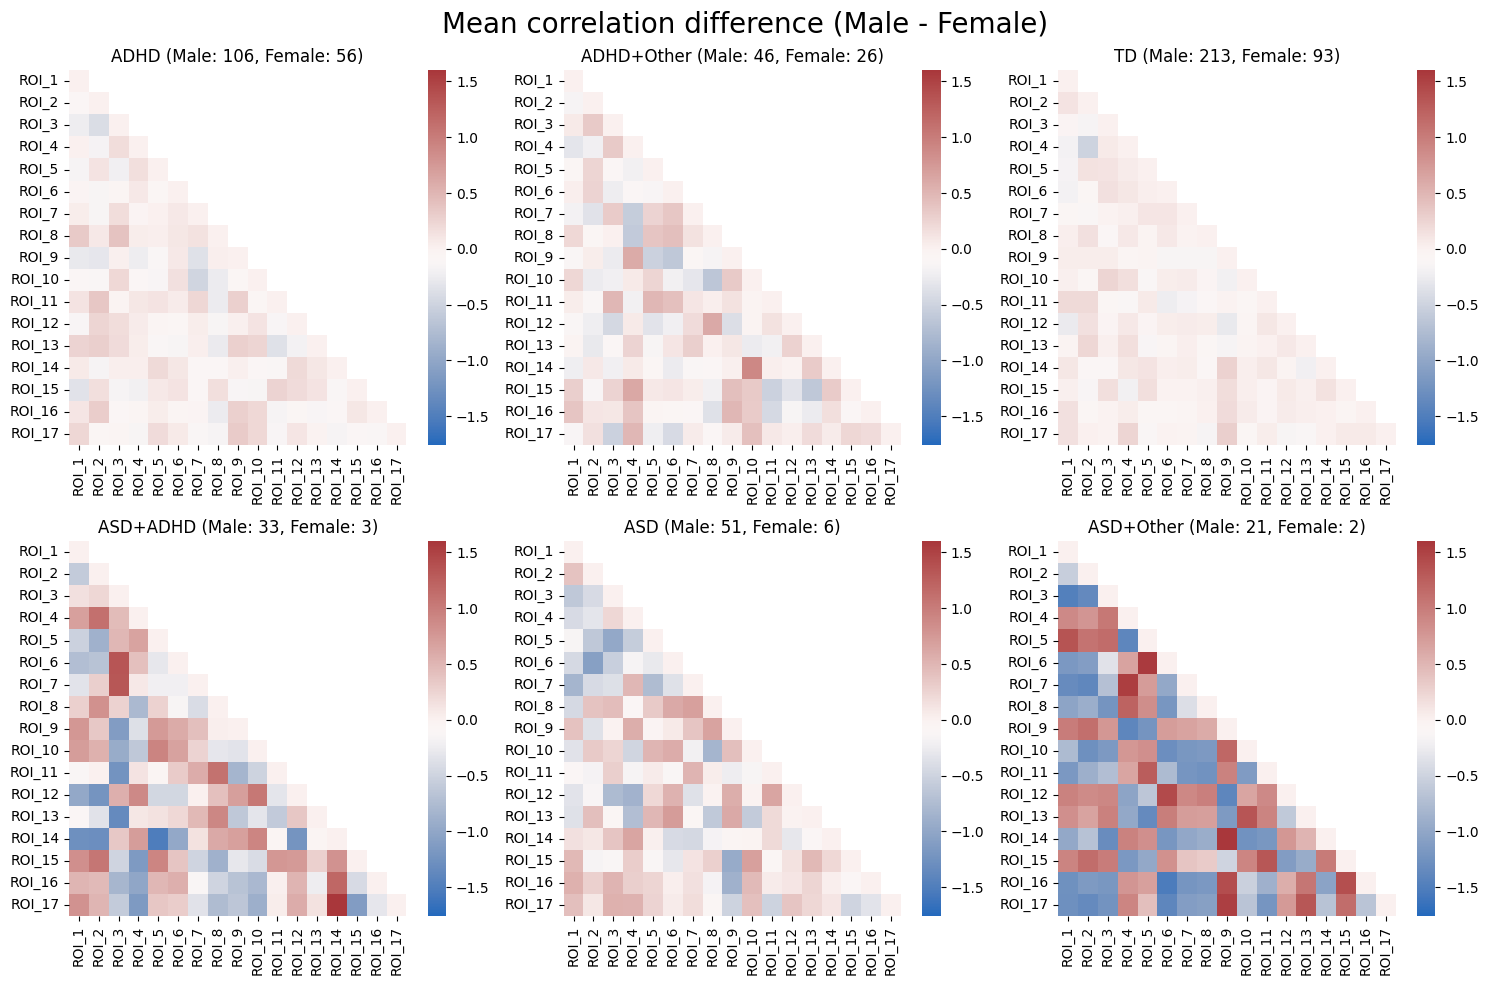

In [120]:
coor_mask = np.triu(np.ones((num_of_rois,num_of_rois), dtype=bool), 1)
color_map = sns.color_palette("vlag", as_cmap=True)

groups = list(mean_data['diagnosis'].unique())

fig, axs = plt.subplots(2, 3, figsize=(15, 10), tight_layout=True)
fig.suptitle('Mean correlation difference (Male - Female)', fontsize = 20)

ax_pos = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2]]

for x in range(len(groups)):
        x_pos,y_pos = ax_pos[x]
        temp_data = mean_data[(mean_data['diagnosis'] == groups[x])]
        
        male_data = temp_data[temp_data['Sex'] == "Male"][roi_names]
        coor_male = male_data.corr()
        
        female_data = temp_data[temp_data['Sex'] == "Female"][roi_names]
        coor_female = female_data.corr()
        
        values = coor_male.to_numpy()-coor_female.to_numpy()
        max_value = values.flatten().max()
        #Create subplot
        sns.heatmap(coor_male-coor_female,
                    vmin = 1.6, #max_value,
                    vmax = -1.6, #max_value,
                    mask = coor_mask,
                    cmap = color_map, 
                    ax = axs[x_pos][y_pos])
        axs[x_pos][y_pos].set_title(f"{groups[x]} (Male: {len(male_data)}, Female: {len(female_data)})")


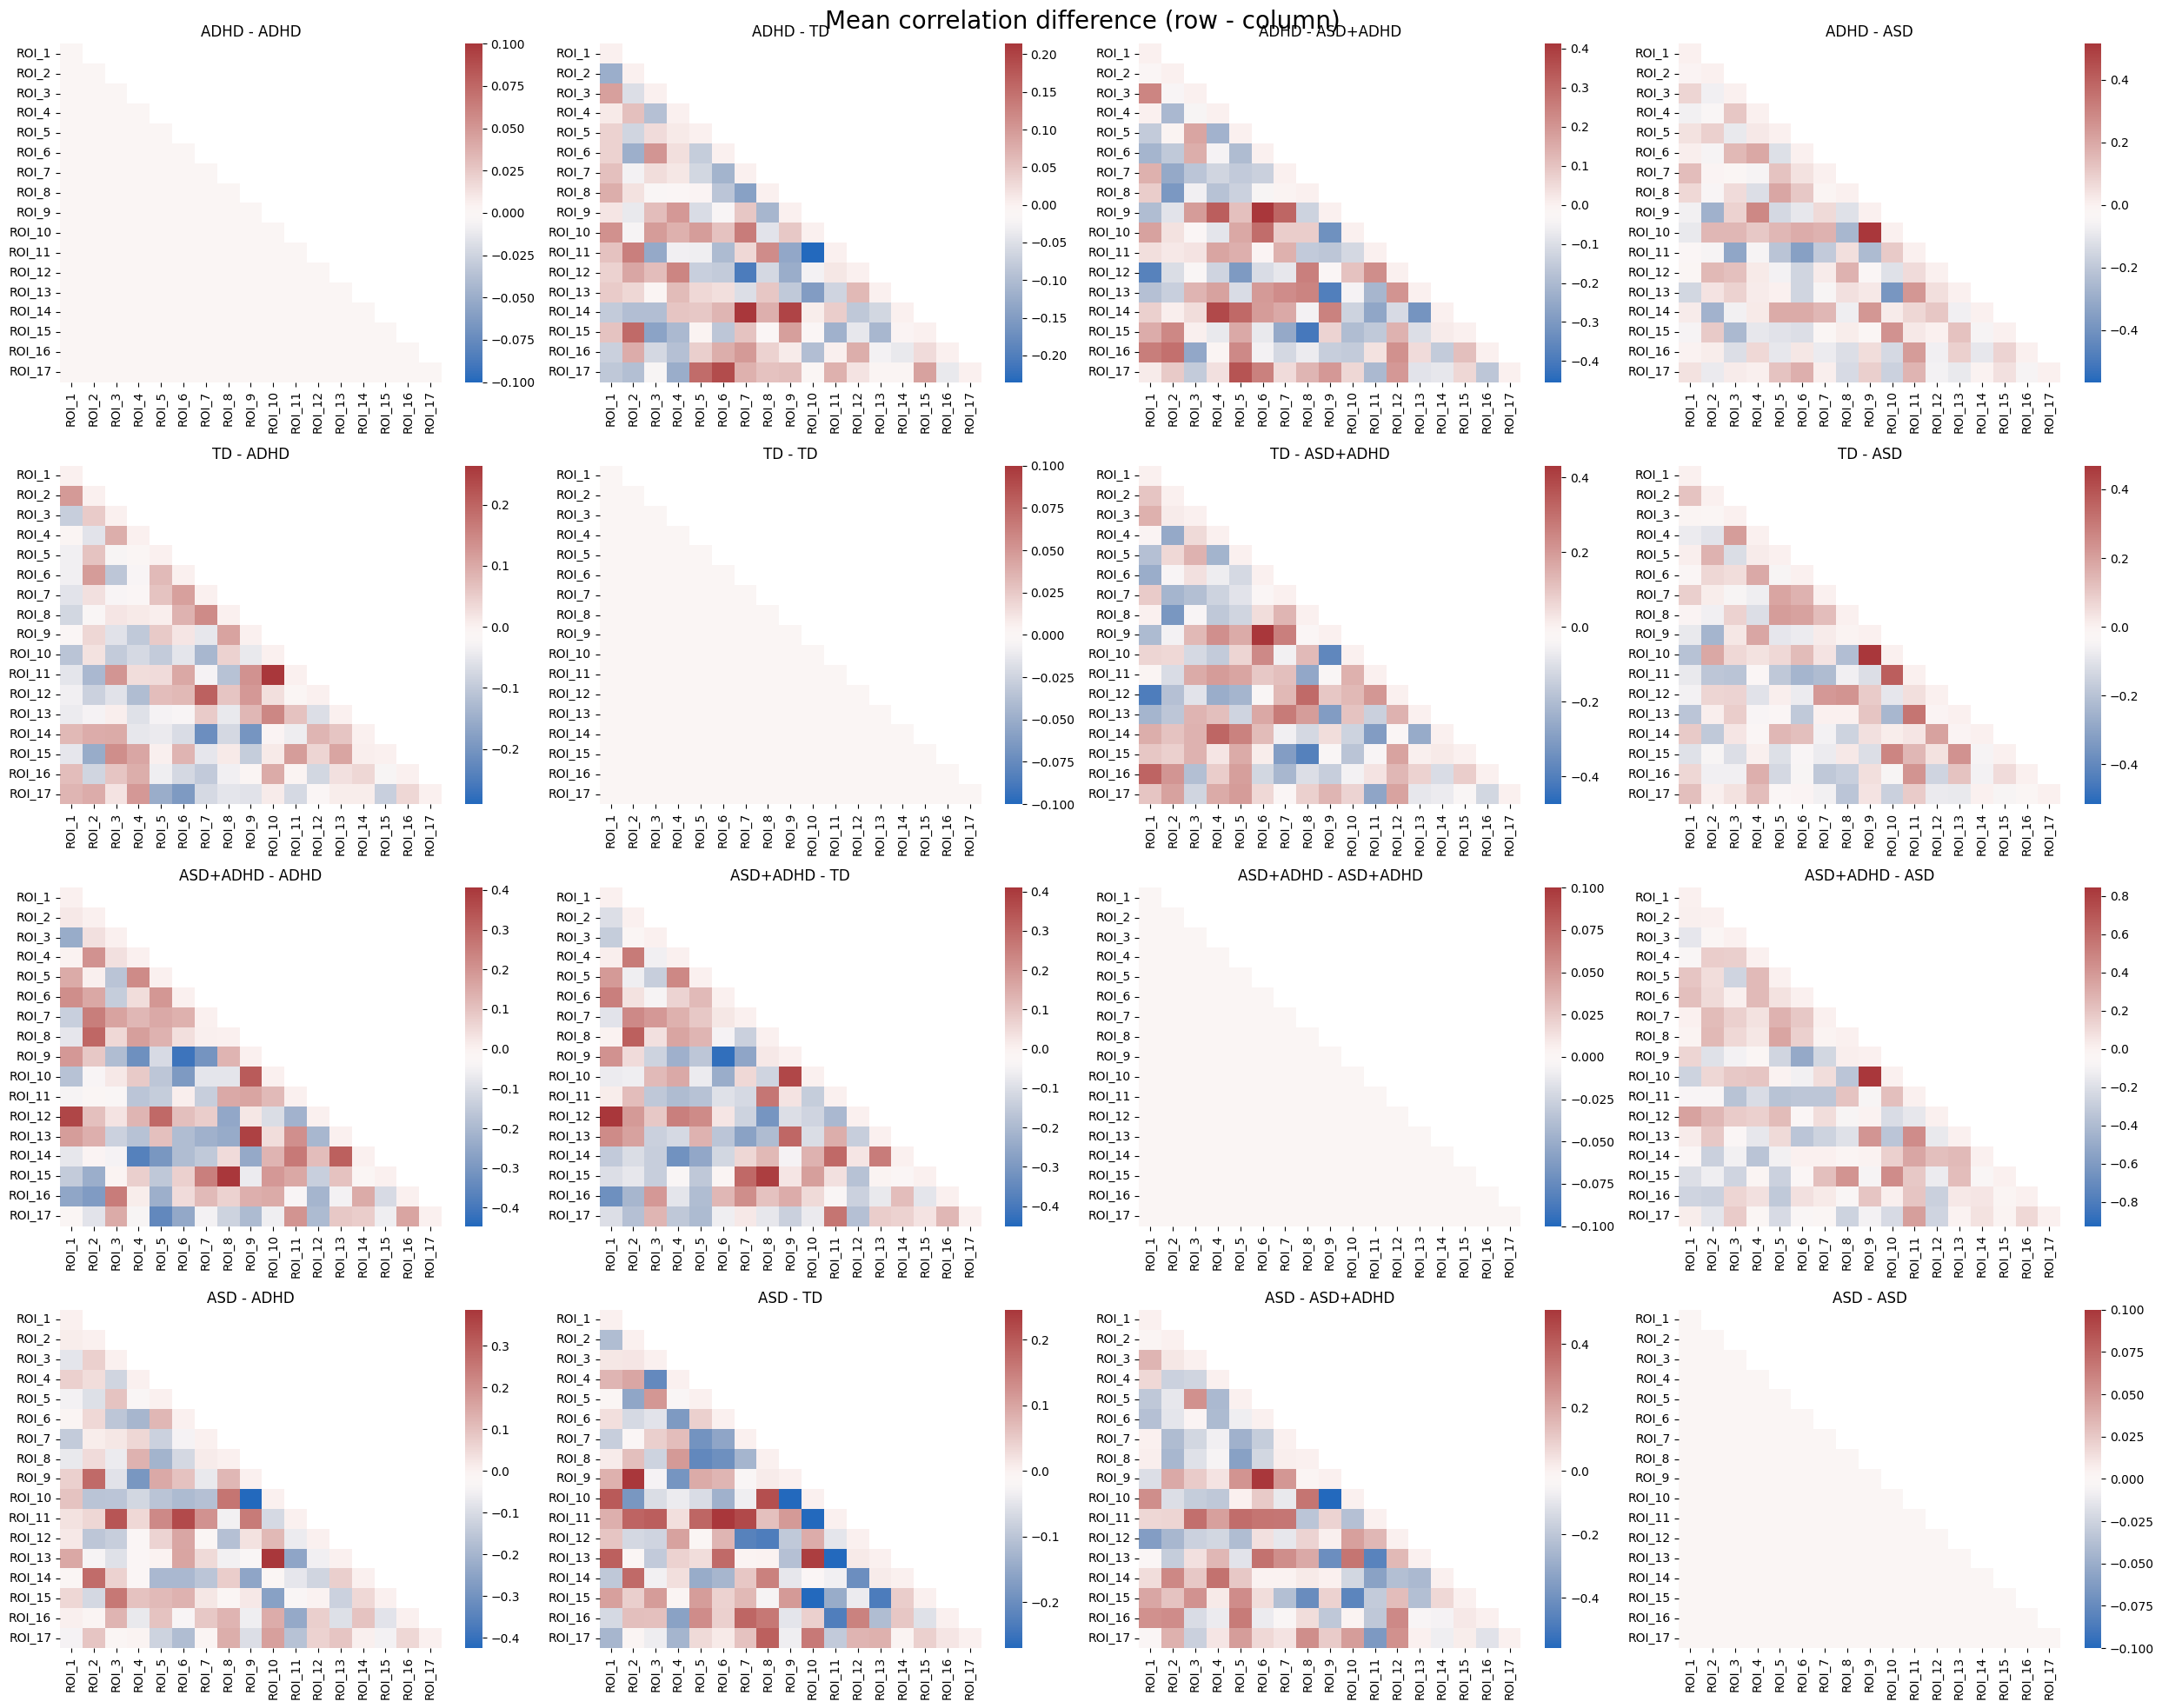

In [107]:
coor_mask = np.triu(np.ones((num_of_rois,num_of_rois), dtype=bool), 1)
color_map = sns.color_palette("vlag", as_cmap=True)
mean_data['short diagnosis'] = mean_data['diagnosis'].apply(lambda x: x.replace('+Other', ''))

groups = list(mean_data['short diagnosis'].unique())

fig, axs = plt.subplots(4, 4, figsize=(25, 20), tight_layout=True)
fig.suptitle('Mean correlation difference (row - column)', fontsize = 20)

for g1 in range(len(groups)):
        for g2 in range(len(groups)):

                group_one_data = mean_data[mean_data['short diagnosis'] == groups[g1]][roi_names].corr()
                
                group_two_data = mean_data[mean_data['short diagnosis'] == groups[g2]][roi_names].corr()
                
                values = group_one_data.to_numpy()-group_two_data.to_numpy()
                max_value = values.flatten().max()
                
                #Create subplot
                sns.heatmap(group_one_data-group_two_data,
                        vmin = max_value,
                        vmax = -max_value,
                        mask = coor_mask,
                        cmap = color_map, 
                        ax = axs[g1][g2])
                axs[g1][g2].set_title(f"{groups[g1]} - {groups[g2]}")


## Variance

There are more differene between these distributions, compared to the mean distributions. Furthermore there are many small p-values (>0.01), when looking at the ROIs and the diagnosis. These values does however have to be corrected to avoid p-hacking.

In [114]:
var_data = pd.read_csv(f'data.nosync/stats/{num_of_rois}_variance_subject.csv', delimiter= ";", index_col = 'Unnamed: 0')
var_data['subject'] = var_data['subject'].apply(lambda x: str(x).zfill(7))
var_data = var_data.sort_values(['subject', 'dataset'])
var_data['Sex'] = meta_data.sort_values(['Sub ID', 'Dataset'])['Sex']

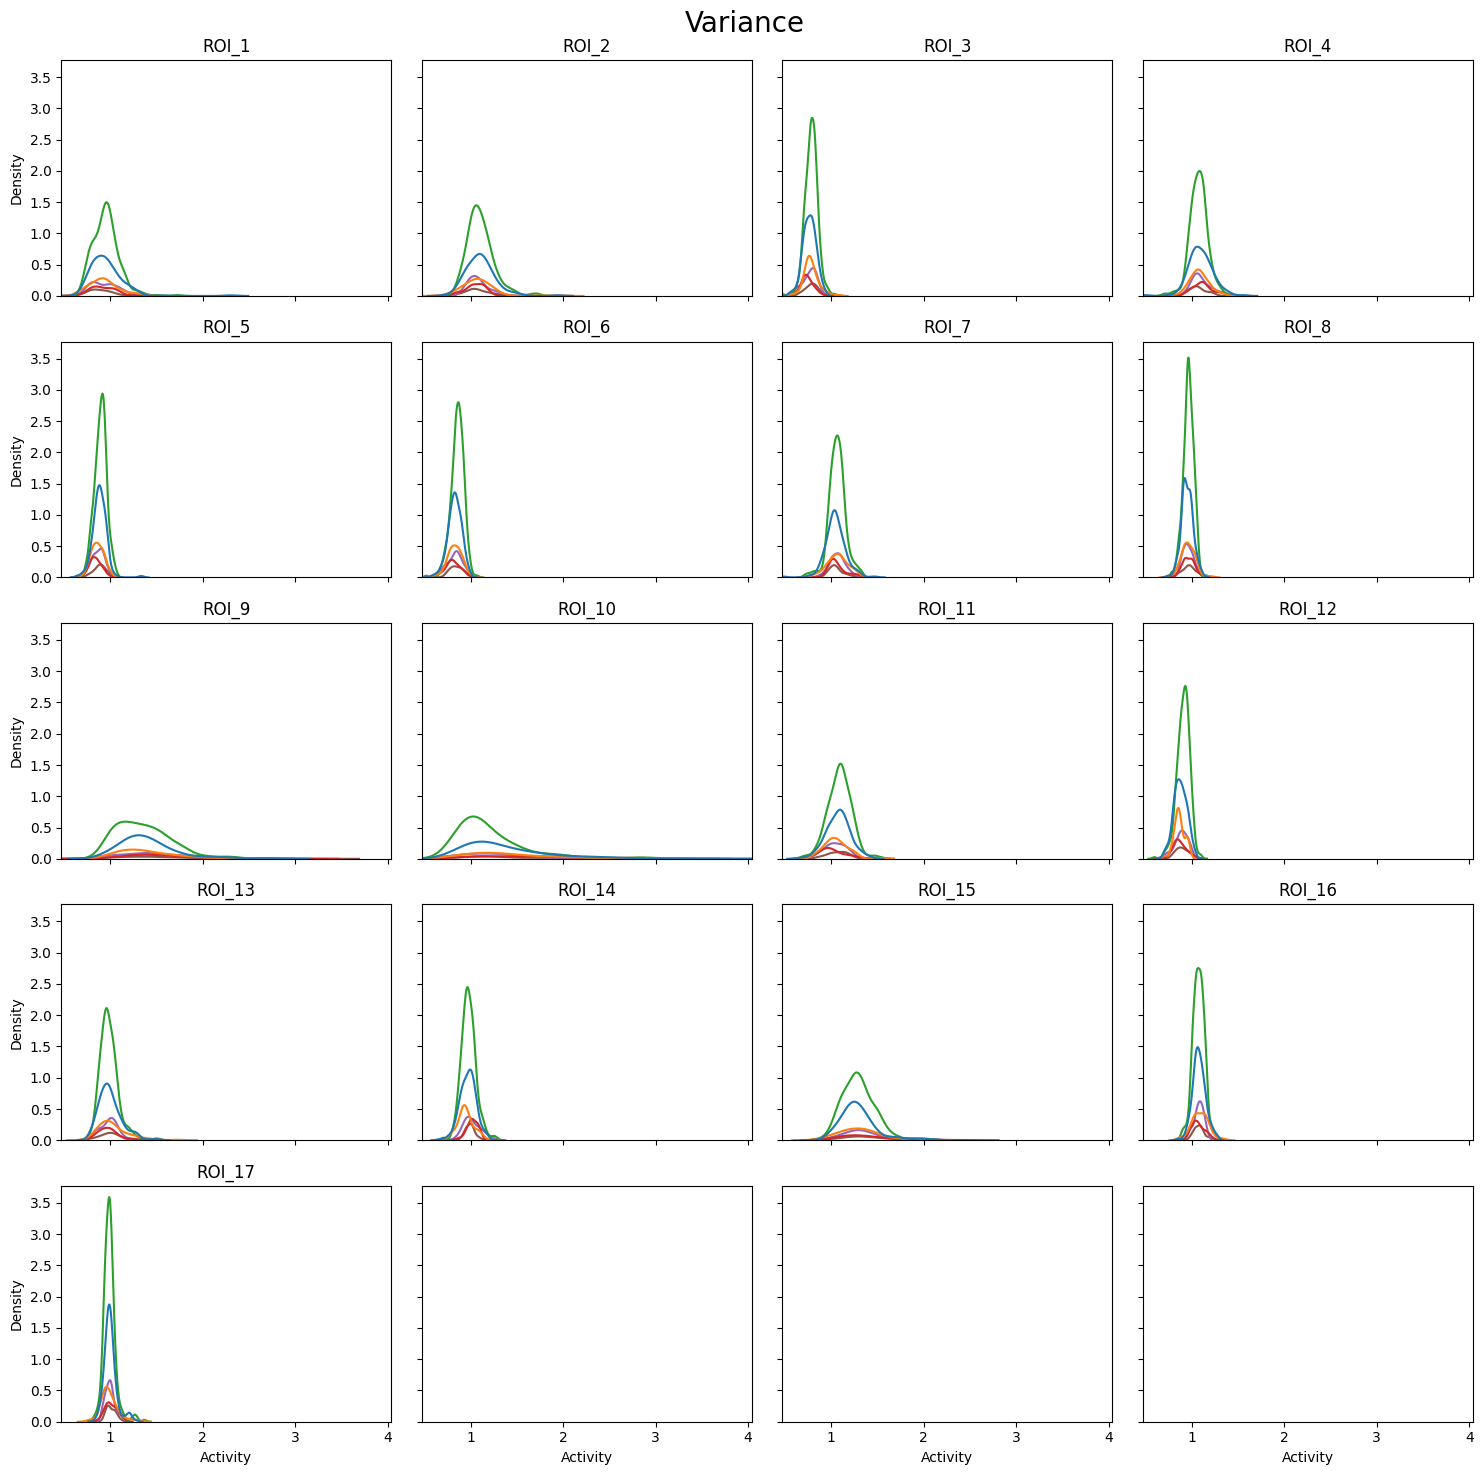

In [115]:
plot_small_multiple_rois(data = var_data, regions = roi_names , title = 'Variance', hue_col = 'diagnosis')

In [116]:
test_dist(data = var_data, regions = roi_names)

ROI_1 (Between sex): The P-value is 0.7945101094866295
ROI_2 (Between sex): The P-value is 0.27411413799332274
ROI_3 (Between sex): The P-value is 0.03539828031989675
ROI_4 (Between sex): The P-value is 0.040536231103099965
ROI_5 (Between sex): The P-value is 0.6072479223404761
ROI_6 (Between sex): The P-value is 0.1935139461350481
ROI_7 (Between sex): The P-value is 0.047007888529308525
ROI_8 (Between sex): The P-value is 0.9140867320582786
ROI_9 (Between sex): The P-value is 0.5061170543774622
ROI_10 (Between sex): The P-value is 0.03791041703517011
ROI_11 (Between sex): The P-value is 0.22418719834133544
ROI_12 (Between sex): The P-value is 0.6804034031402724
ROI_13 (Between sex): The P-value is 0.0004859647018803902
ROI_14 (Between sex): The P-value is 0.15151636056822335
ROI_15 (Between sex): The P-value is 0.011485586846625914
ROI_16 (Between sex): The P-value is 0.3397066166007159
ROI_17 (Between sex): The P-value is 0.017170889361555995
#########################################

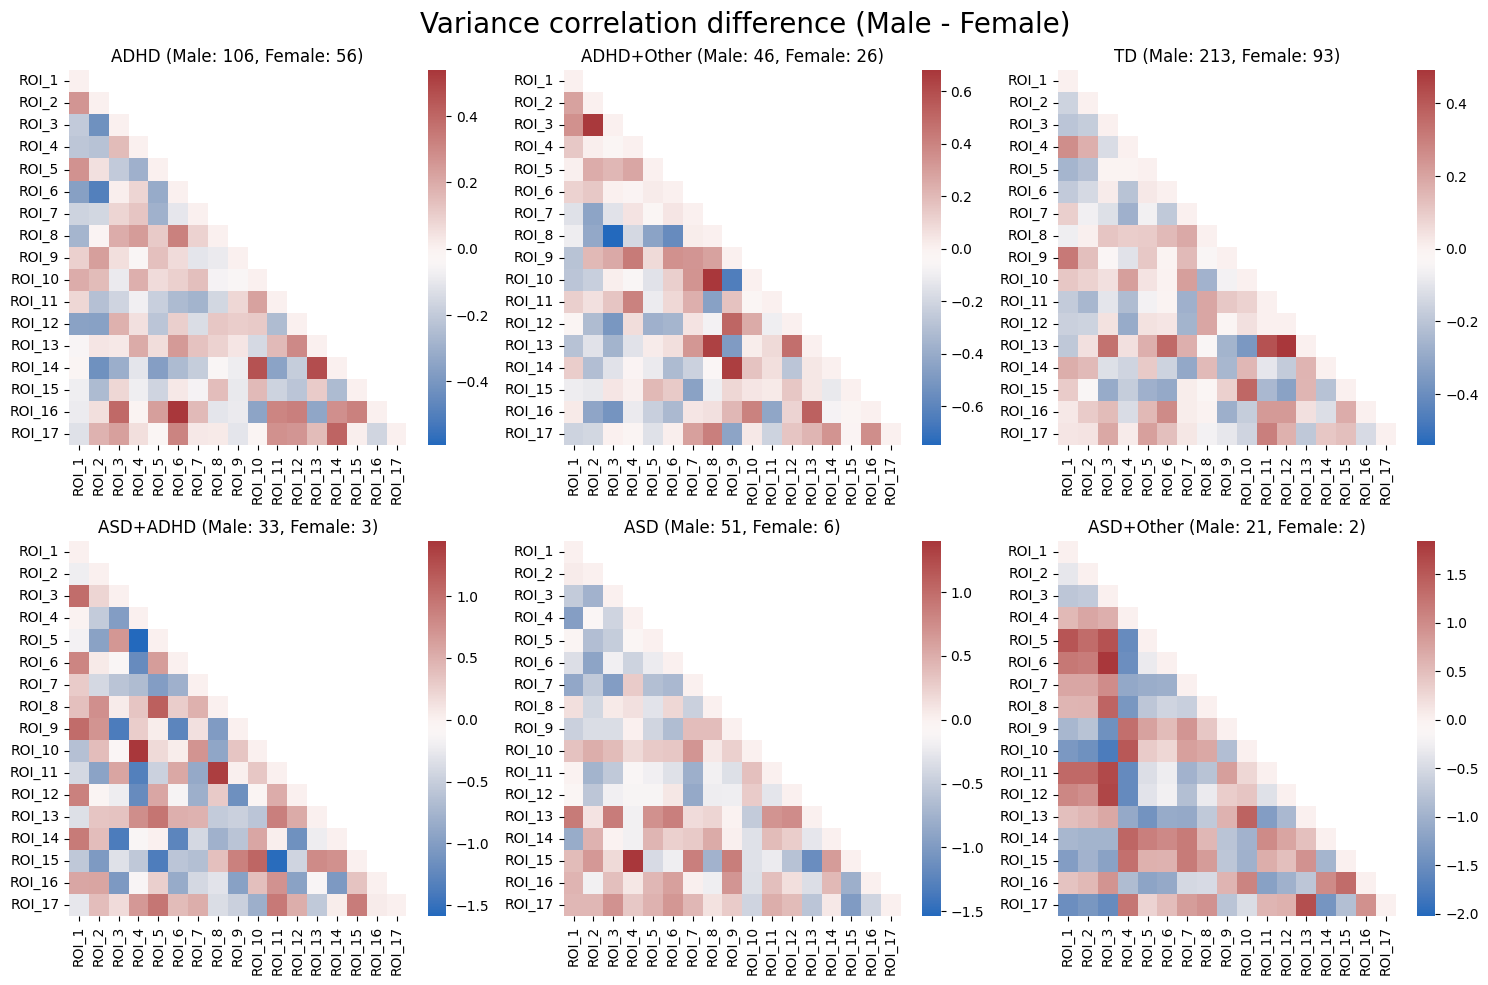

In [117]:
coor_mask = np.triu(np.ones((num_of_rois,num_of_rois), dtype=bool), 1)
color_map = sns.color_palette("vlag", as_cmap=True)

groups = list(var_data['diagnosis'].unique())

fig, axs = plt.subplots(2, 3, figsize=(15, 10), tight_layout=True)
fig.suptitle('Variance correlation difference (Male - Female)', fontsize = 20)

ax_pos = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2]]

for x in range(len(groups)):
        x_pos,y_pos = ax_pos[x]
        temp_data = var_data[(var_data['diagnosis'] == groups[x])]
        
        male_data = temp_data[temp_data['Sex'] == "Male"][roi_names]
        coor_male = male_data.corr()
        
        female_data = temp_data[temp_data['Sex'] == "Female"][roi_names]
        coor_female = female_data.corr()
        
        values = coor_male.to_numpy()-coor_female.to_numpy()
        max_value = values.flatten().max()
        #Create subplot
        sns.heatmap(coor_male-coor_female,
                    vmin = max_value,
                    vmax = -max_value,
                    mask = coor_mask,
                    cmap = color_map, 
                    ax = axs[x_pos][y_pos])
        axs[x_pos][y_pos].set_title(f"{groups[x]} (Male: {len(male_data)}, Female: {len(female_data)})")


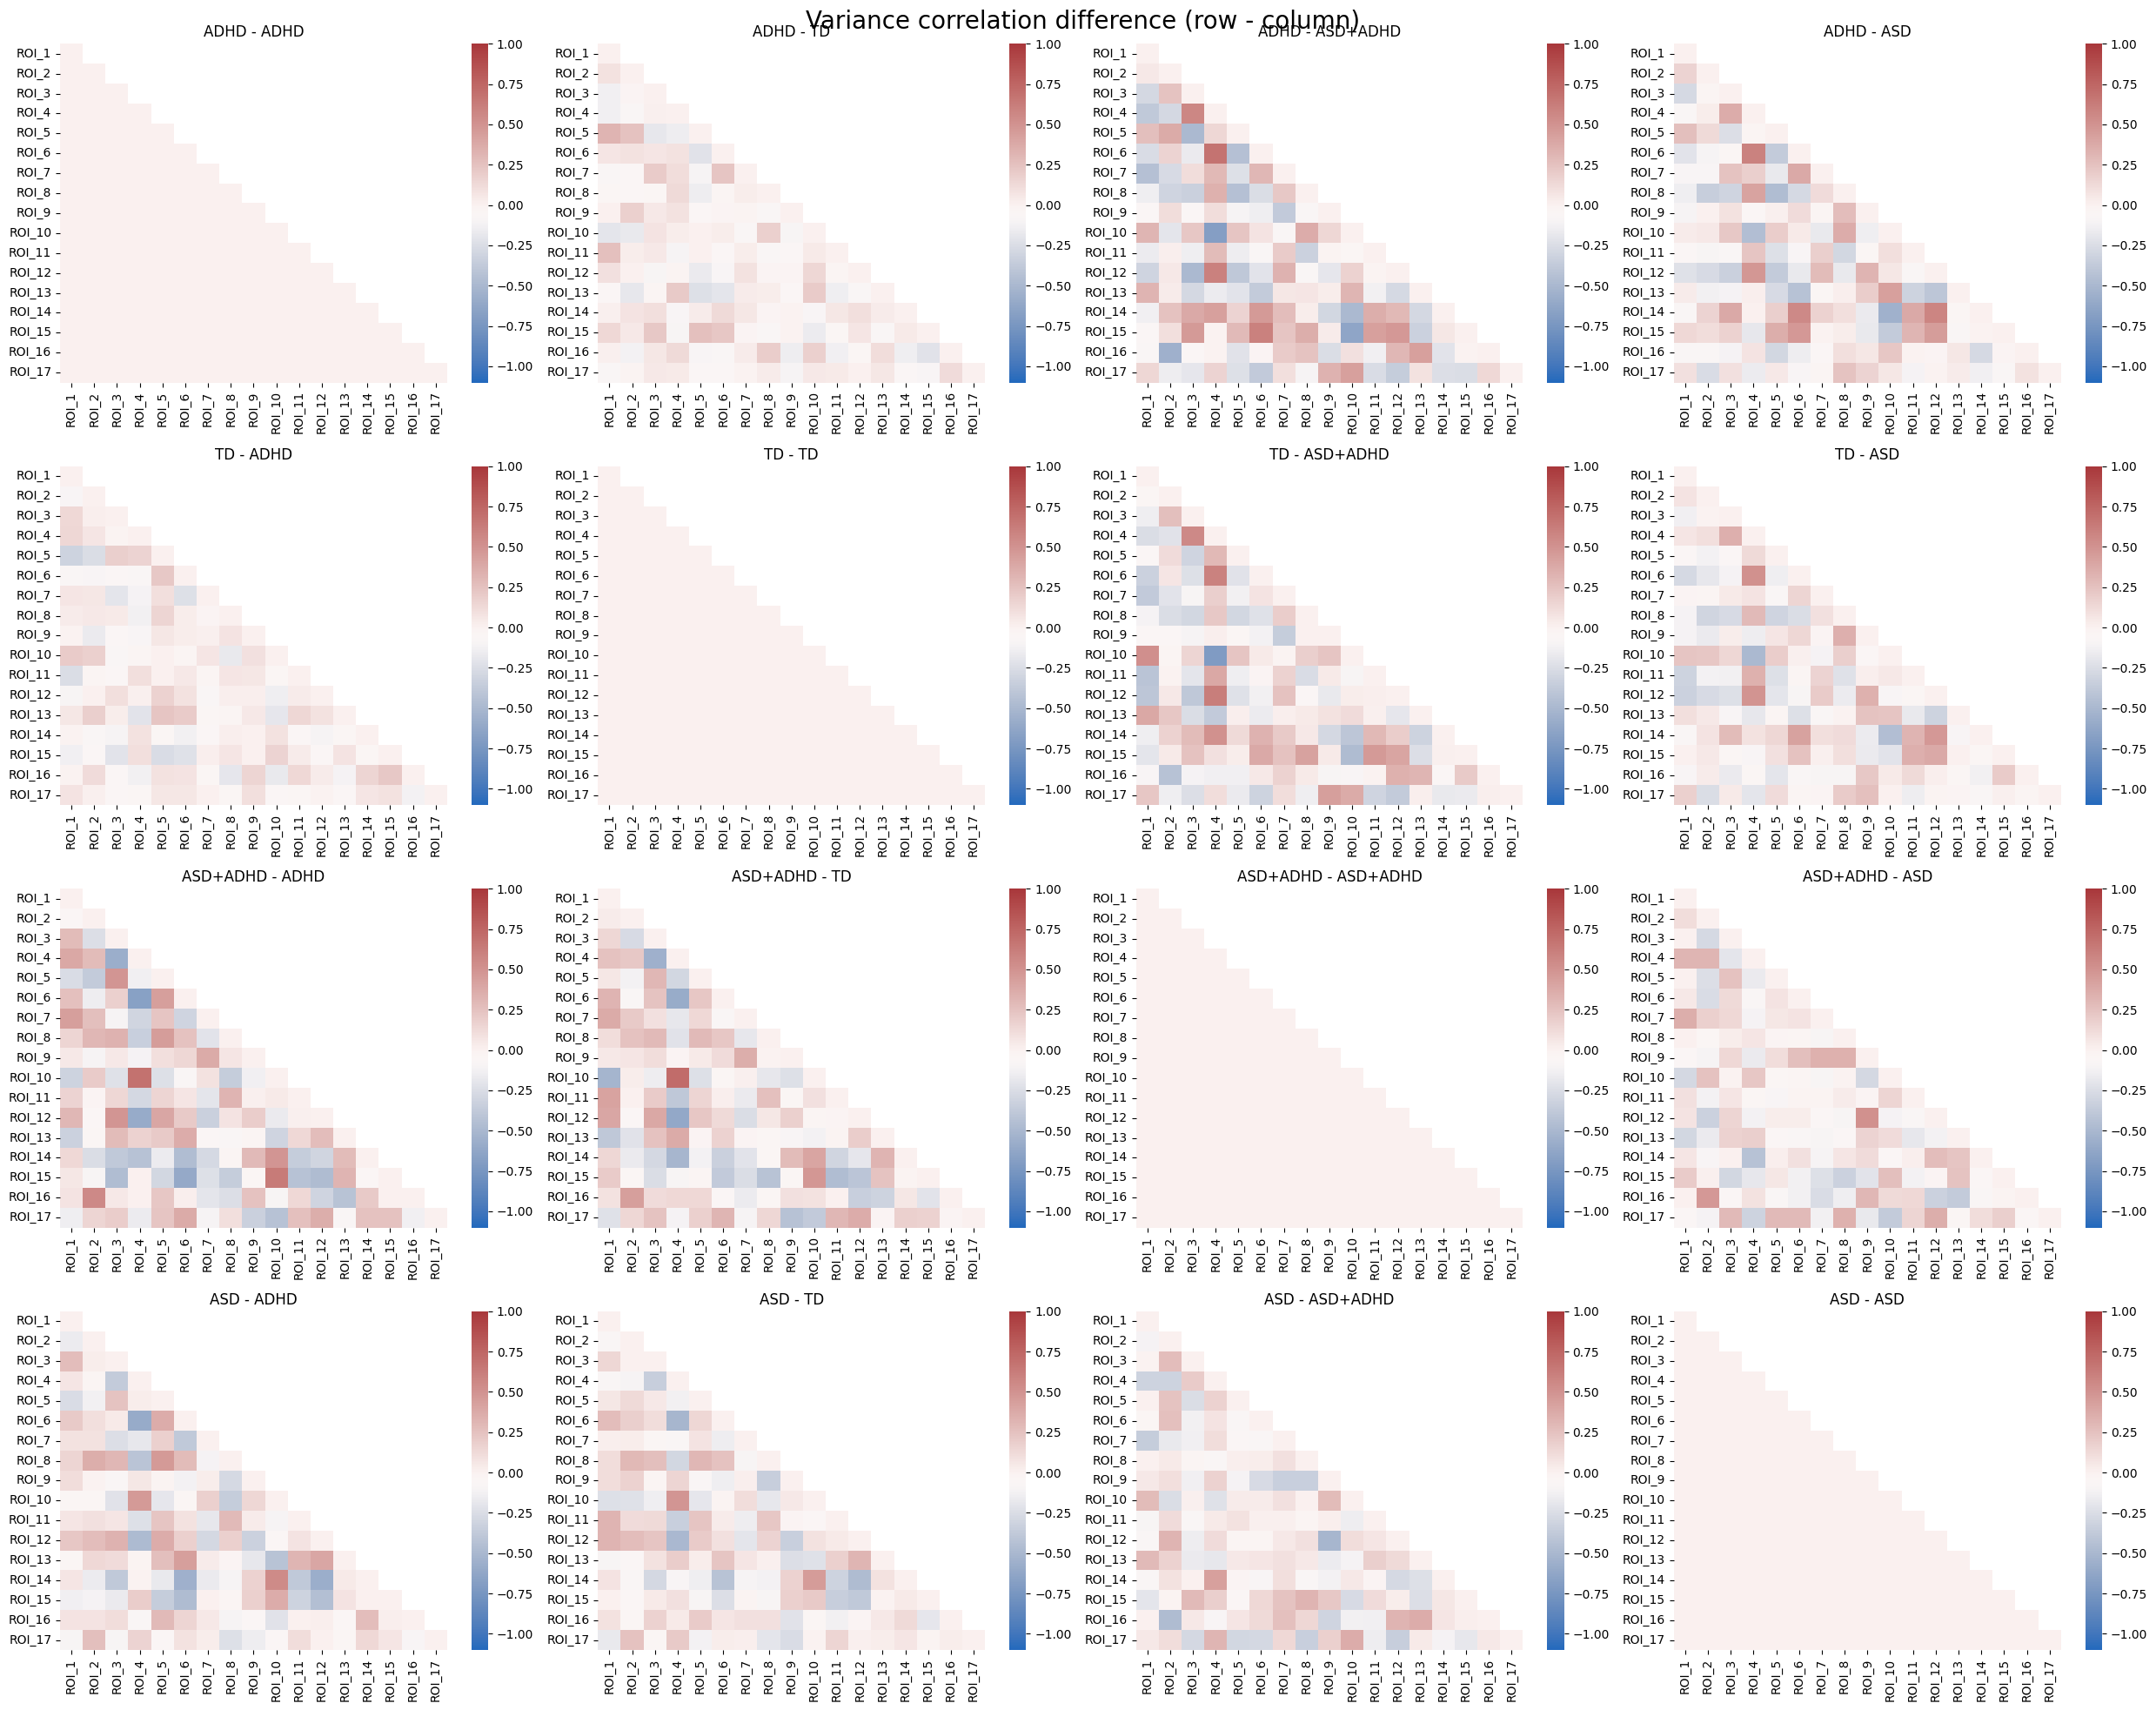

In [128]:
coor_mask = np.triu(np.ones((num_of_rois,num_of_rois), dtype=bool), 1)
color_map = sns.color_palette("vlag", as_cmap=True)
var_data['short diagnosis'] = var_data['diagnosis'].apply(lambda x: x.replace('+Other', ''))

groups = list(var_data['short diagnosis'].unique())

fig, axs = plt.subplots(4, 4, figsize=(25, 20), tight_layout=True)
fig.suptitle('Variance correlation difference (row - column)', fontsize = 20)

for g1 in range(len(groups)):
        for g2 in range(len(groups)):

                group_one_data = var_data[var_data['short diagnosis'] == groups[g1]][roi_names].corr()
                
                group_two_data = var_data[var_data['short diagnosis'] == groups[g2]][roi_names].corr()
                
                values = group_one_data.to_numpy()-group_two_data.to_numpy()
                max_value = values.flatten().max()
                
                #Create subplot
                sns.heatmap(group_one_data-group_two_data,
                        vmin = 1,#max_value,
                        vmax = -1, #max_value,
                        mask = coor_mask,
                        cmap = color_map, 
                        ax = axs[g1][g2])
                axs[g1][g2].set_title(f"{groups[g1]} - {groups[g2]}")

# Network construction

In [23]:
bin = 21
for i in range(bin, 173, bin):
    print([i-bin,i])

[0, 21]
[21, 42]
[42, 63]
[63, 84]
[84, 105]
[105, 126]
[126, 147]
[147, 168]


In [19]:
meta_data.iloc[20:40]

,Sub ID,Dataset,file_path,Age,Sex,IQ,Diagnosis,Co-Diagnosis
20,0051009,ABIDEI,data.nosync/clean/ABIDEI_17/sub-0051009_ses-1_...,11.03,Male,86.0,ASD,NaN
21,0050964,ABIDEI,data.nosync/clean/ABIDEI_17/sub-0050964_ses-1_...,12.75,Male,106.0,ASD,NaN
22,0050954,ABIDEI,data.nosync/clean/ABIDEI_17/sub-0050954_ses-1_...,14.75,Female,78.0,ASD,NaN
23,0050973,ABIDEI,data.nosync/clean/ABIDEI_17/sub-0050973_ses-1_...,17.88,Male,112.0,ASD,ADHD
24,0051030,ABIDEI,data.nosync/clean/ABIDEI_17/sub-0051030_ses-1_...,7.29,Male,139.0,ASD,ADHD
25,0051051,ABIDEI,data.nosync/clean/ABIDEI_17/sub-0051051_ses-1_...,14.06,Female,115.0,TD,NaN
26,0051041,ABIDEI,data.nosync/clean/ABIDEI_17/sub-0051041_ses-1_...,8.90,Female,100.0,TD,NaN
27,0051000,ABIDEI,data.nosync/clean/ABIDEI_17/sub-0051000_ses-1_...,13.33,Male,78.0,ASD,ADHD
28,0051011,ABIDEI,data.nosync/clean/ABIDEI_17/sub-0051011_ses-1_...,8.79,Male,104.0,ASD,NaN
29,0050982,ABIDEI,data.nosync/clean/ABIDEI_17/sub-0050982_ses-1_...,9.46,Male,119.0,ASD,NaN


In [36]:
'ROI_7_var'[:5]

'ROI_7'